
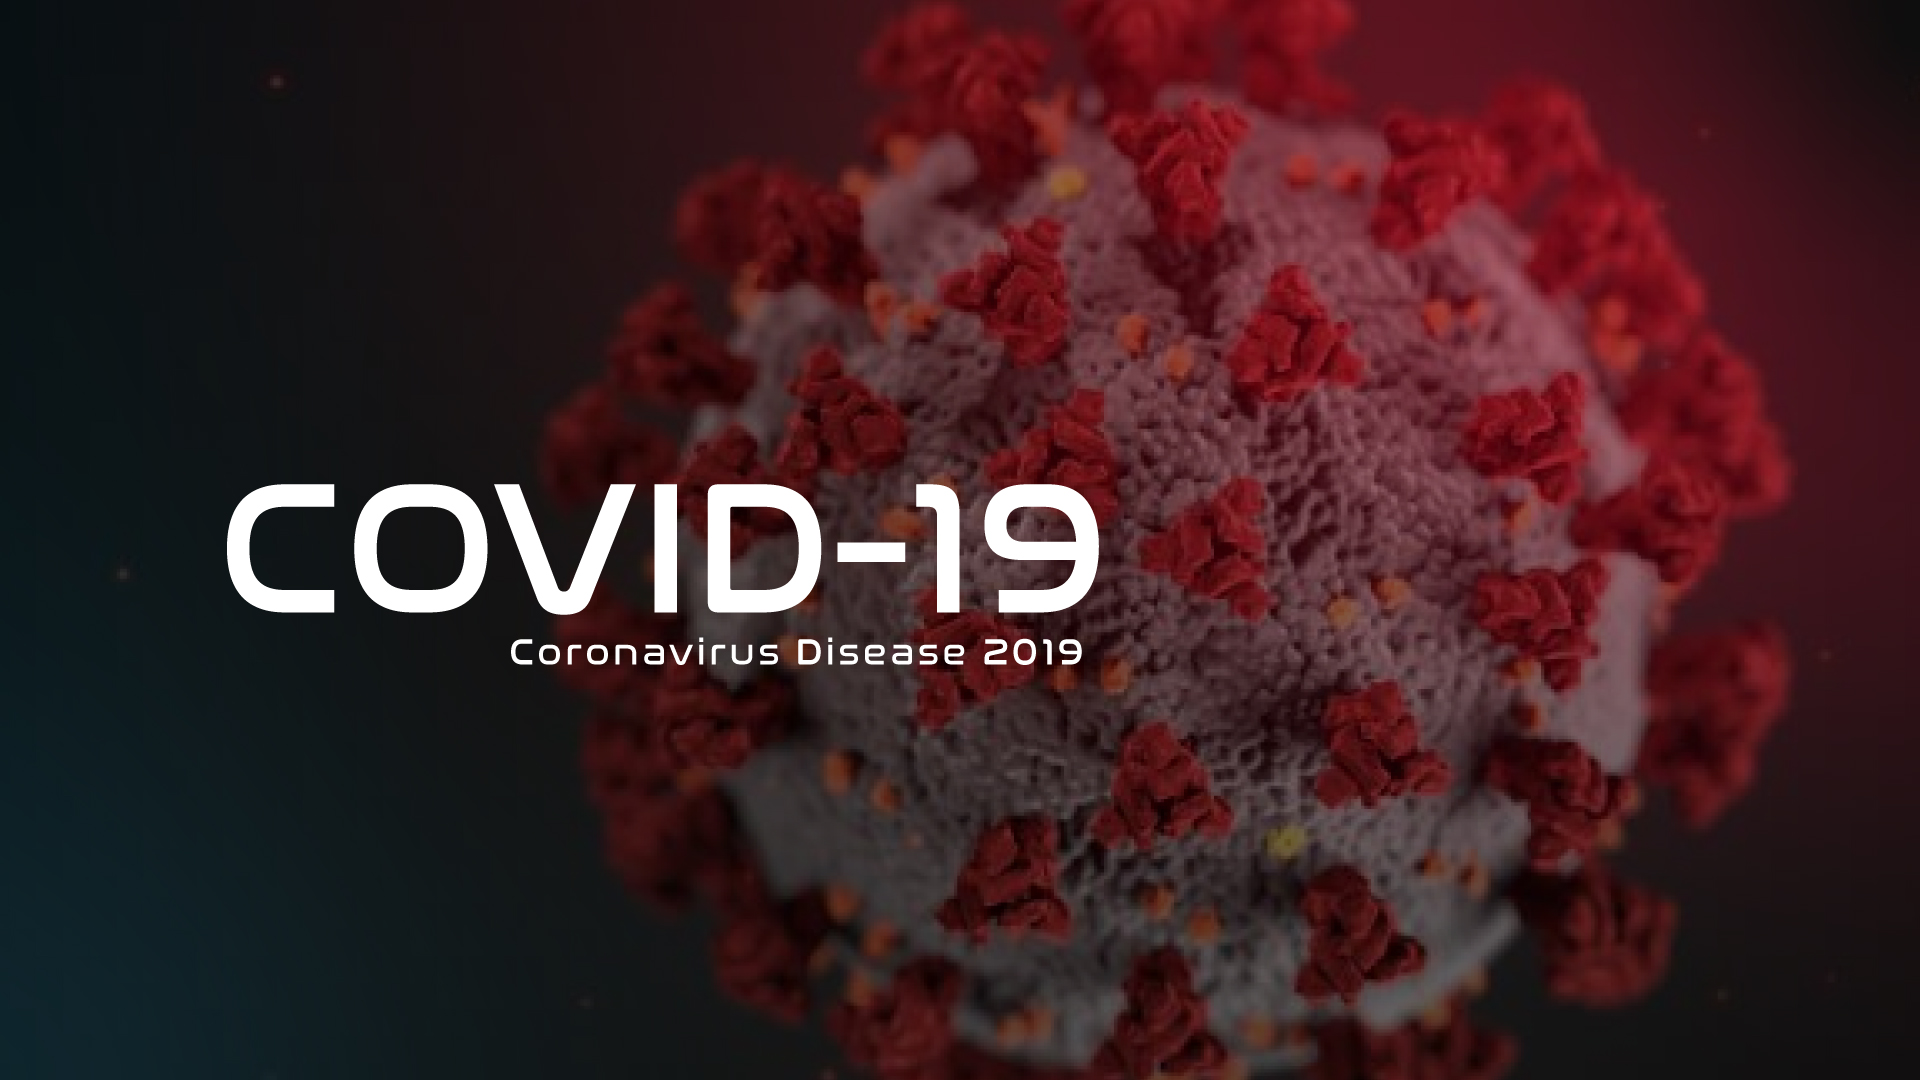

# Project Description
The objective of this project is to integrate the state of the art Natural Language Processing (NLP) techniques to create a method to ask a database a question and have it return sensible results that answer that question.  In addition, we can apply modern document analysis methods to exctract tabular, figure, and numeric data when possible.  Eventually, this could be built into a scientific search system that can reduce a body of knowledge to a small number of records and then extract data into machine readable formats to support further modeling and data analysis.

# Background

I am interested in semantic NLP for mining the CORD-19 data set.  My initial literature review lead me to Open Domain Question and Answering and semantic search engines as a means to quickly reduce scientific information to just a few records that would be of most interest.  I found a fairly simple [mehtod](https://arxiv.org/abs/1902.01718) that had very good results.  Full credit to Yang and colleagues at University of Waterloo.

## Semantic search with BERT-SQuAD
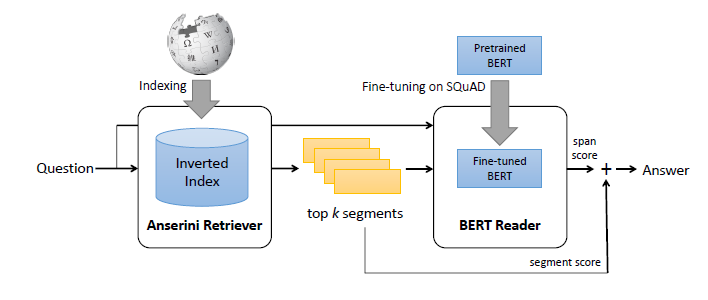
Figure 1: BERT-Serini Achitecture proposed by [Yang et al](https://arxiv.org/abs/1902.01718)

In this work, Yang et al combined Anserini and Bert-SQuAD to produce a single "best" answer.  [Anserini](https://github.com/castorini/anserini) is a search engine which is built on top of Apache Lucene which can go and search literature and return ranked records.  In their work, they used an NL question to drive Anserini and return a ranked number of segments from all of wikipidia.  Following this, they ran the same question over all the segments using BERT-SQuAD to produce set of spans.  The spans were then ranked by a linear combination of the span and segment score and the top was then taken as the answer.  I believe this is a great way to go because everything is analyzed by semantics of the question being posed and the number of records that neat to be searched by BERT-SQuAD is minimal which is good becuase that is quite intense.

This intrigued me so I went to go see what I could do with this and when I went searching for Anserini, I found that they had already made a [CORD-19 Lucene data base](https://github.com/castorini/anserini/blob/master/docs/experiments-covid.md).  This was convenient and openly available.  I also found a starter example using BERT on [colab](https://colab.research.google.com/drive/1L_yWXM4tOhZsHpMDNIIux-hfp1-pW3RL#forceEdit=true&sandboxMode=true&scrollTo=KVXWA6WS0aqJ).  Essentially, I thought it would be valuable to impliment the Yang et al methodology but use the CORD-19 data base instead of wikipedia.  I had enough to get going using Anserini and figured out how to switch out BERT for a BERT-SQaAD method like they did in Yang et al.

## Semantic Ranking with Universal Sentence Encocer

I found a good method to rank retrieved results that is probably better for this application than Yang's linear combination method.  I am applying Google's Universal Sentence Encoder to produce a similarity matrix that mathmatically represents the semantic similarity of all the answers to that of the question.  I use that information to rank the order of the returned results.  It is not too slow to be useful and does not take up much more space.  I believe this is useful because the best answers are usually semantically simillar to the question being asked.

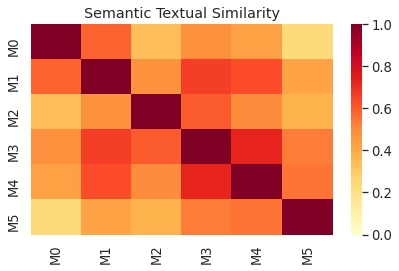
Figure 2: Example Semantic Ranking
  * M0 = "How does weather, heat, and humidity affect the tramsmission of 2019-nCoV"
  * M1 = "conclusions : a wide range of continuous warm and dry weather is conducive to the survival of 2019-ncov ."
  * M2 = "formalin fixation and heating samples to 56oc, as used in routine tissue processing, were found to inactivate several coronaviruses and it is believed that 2019-ncov would be similarly affected ."
  * M3 = "objective to investigate the impact of temperature and absolute humidity on the coronavirus disease 2019 (covid-19) outbreak ."
  * M4 = "taken chinese cities as a discovery dataset, it was suggested that temperature, wind speed, and relative humidity combined together could best predict the epidemic situation ."
  * M5 = "in the next years the engagement of the health sector would be working to develop prevention and adaptation programs in order to reduce the costs and burden of climate change."

## Auto Summarization with BART
I thought it would be good to generate a summarization based on the top results.  I found that hugging face transformers just released a [pretrained "BART" model](https://sshleifer.github.io/blog_v2/jupyter/2020/03/12/bart.html) for "Abstractive Summarization". I found this works fairly well when the evidence deals directly with the question.  If the generated summary does not appear to answer the question, it is an indication that the body of evidence either does not directly deal with the question (ie the evidence is there but mentioned in passing) or that the evidence is not clear.

## Full PDF Links
In order to do further data analysis like table/figure extraction, we need full text pdfs. I found a [tool](https://pypi.org/project/metapub/) that can follow a pubmed link and find a direct link to a publically available PDF.  I integrated this tool into the search.  With the ability to pull full PDF's, we can apply common table and figure extraction methods.

## Understanding How to Get Best Results
It is important to remember the sequence of events to generate the most relevant results.  First, answerini is fed the question and keywords.  BERT-SQuAD is then used to find passages that are relevant.  The Universal Sentance Encoder similarity search is then used to rank the passeges found by BERT.  The BART model is then used to abstractively summarize the top results.  Because so much is done by symantic comparison, small changes in the question can rerank results and affect what BART sees for the sumary.

In general, I find that this proceedure is best:
1) start with a general question like "what is the effect of smoking" and put synonyms for the disease and other cofactors in the keywords to drive answerini to relevant results
2) review the evidence and see if there are more keywords to add to get the search results better
3) start working on the question a little bit by trying to make it more or less specific, for instance: change the question to "what is the effect of smoking on patients" or "what is the effect of smoking on 2019-nCov patients".  This will help drive the ranking and thus the summary that is generated.

I find that 2-3 searches is all it takes to generate highly specific results.  

## Future Plans Past Kaggle Competition
I think this is a tool that would be generally useful for all of scientific R&D and would like to build this into a publically available web based tool that would be free to use.

## Acknowledgements
I think [Jimmy Lin](https://cs.uwaterloo.ca/~jimmylin/), Edwin Zhang, and Nikhil Gupta at the University of Waterloo deserve major credit here.  Jimmy is on the arXiv paper and also on the anserini project.  Props to him for making this possible.


## Notes About any Prises
I am not interested in any prises and ask that anything gained be directly donated to further research and support.  If anything, Jimmy probably deserves more credit for this than me.  I just got his method set up and working here and started askign questions.  I hope to someday meet Jimmy and thank him

# Updates and Notes
version 59 - prevalence of virus in general population

version 58 - cancelled

version 57 - medrxiv interface, neutralizing antibodies and protection

version 56 - fixed bug in pubmed search, handle id error

version 55 - update with latest lucene db

verstion 54 - more questions.

version 53 - filling out questions and making features turn on or off for quicker run time.

version 52 - Built interface that allows for analysis of abstracts that result in token lengths of up to 1024 tokens.  Can easily be expanded to longer results, but for abstract analysis this is all that is needed (I think).  It detects if the tokenizer gives more than 512 tokens and then splits the document into two pieces.  In most cases, the total token length was under 800.  This gives plenty of overlap to pick out the best segment.  Also corrected a couple bugs that should make it possible to run on GPU.

version 51 - refining questions to get more relevant results.

version 50 - upped the num_beams to 10 for the BART model and allowed the summary to be longer.  It tends to produce better results given these settings.  However, increasing the num_beams parameter makes it run slower.  Updated to latest database released on 4/3/2020

version 49 - code refactoring to make it easier to manage.  Starting to tackle the BERT 512 token limit.  Tagged results that are too long.  Need to rewrite the function so that long passages are split up with some overlap and then rejoined in a sensible manner.  The "Too Long" heading in the tables indicates if the passage was too long for a single run through BERT.

version 48 - cancelled

version 47 - fixed bug around find it

version 46 - found some tools in [metapub](https://pypi.org/project/metapub/) that can go get a direct link to a publically available pdf.  This is slow but it allows us to do further document analysis if we can get a full pdf.

Version 45 - canceled

Version 44 - Switched to "Abstractive Summarizer" based on BART (yes thats spelled correctly) in transformers.  Does a better job of generating meaningful summaries though it is slower.  Redid heat map so that it is easier to see and read the text.

Version 43 - Implemented an "Extractive Summarizer" based on BERT to automatically summarize the body of evicence.  It does well when there is a decent body of evidence to pull from.  If there isn't... well not so much.

Version 42 - cancelled

Version 41 - Implemented a new ranking methodology based on Google's Universal Sentance Encoder and a similarity matrix.  See this [notebook](https://www.kaggle.com/dirktheeng/universal-sentence-encoder-for-nlp-matching) for a foundational example.  Answers are now ranked based on semantic similarity to the question asked.

Version 40 - Switched terms from context to semantic.  I'm not an expert in this field, but I beleive this is a better way to talk about the work.

Version 39 - Got segment highlighting turned on in the reported table so we can see exactly what bert-squad focused on in the text and possibly make better decisions about refinement.

Version 38 - updated intro to provide more context to users about the project, how it works, and why it may be a good thing to use.

Version 37 - Fixed an error in the confidence calculation that was causing a NAN and thus the abstracts to be excluded from analysis.  Changed the calculation method for ranking to switch to probability within the body of retrieved results.  I am not sure that this is very meaningful yet as the highest score results also tend to contain the fewest tokens coming out of BERT.  That is not always meaningful and I am not sure that this means that the answer is more relevant than any other.  I would like to build a second model on top of all the search results to rerank the returned results somehow.  Perhaps a tf-idf method would work?  I also rewrote the sentance recontstruction method from tokens.

Version 35-36 - Funny story.  This morning before work I went to start on completing a couple tasks.  I got a phone call and left my computer within reach of my 2 year old son.  He managed to insert a bunch of text in the code and check it in as well as change my screen settings in a way that I had never seen before (Took me like 20 minutes to fiture out how to fix it).  He also made a bunch of appointments on my calendar and was somehow browsing wikipedia for pictures of the earth from space.  I'm not making this up.  I didn't even see that the code had issues until i got off work.  I couldn't help but laugh.  Anyhow, hopefully this works now.

Version 33 - reached a decent level of stability.  Had an email discussion with Jimmy Lin.  Found out that AI2 is updatding the COVID-19 database weekly.  So far, UW has been updating Anserini with the [new data](https://github.com/castorini/anserini/blob/master/docs/experiments-covid.md) as it comes out.  In order to make this more responsive to the needs of researchers, I integrated a pubmed search engine that goes and grabbs the newest data from the last lucine update and merges it into the search automatically.  This capability is built on top of [Biopython](https://biopython.org/).  In order to use it, you need to define a set of pubmed keywords.  Pubmed searches don't seem to like a large number of keywords.  It seems to narrow the reults rather than widen them (seems the opposite of Anserini).  See the competition question setup for examples.

# Tasks to be completed

~~1) build a better sentance reconstruction function to put text back together from BERT-SQuAD~~

2) build an interfact to Google Scholar using [scholarly](https://pypi.org/project/scholarly/)

~~3) build a better answer ranking system than relying on confidence from answers from individual text~~

~~4) build a method better handle cases that exceed 512 tokens (right now they are cut off at 512)~~

~~5) build a summarization system based on distilBert see this [notebook](https://www.kaggle.com/latong/extractive-text-summarization-ner-exploration)~~

~~6) make table link text be the title of the paper~~

7) use sciBert/biobert for NER to extract keywords to drive supmemental searches

Set up some parameters in the kernel

In [ ]:
USE_SUMMARY = True
FIND_PDFS = True
SEARCH_MEDRXIV = True
SEARCH_PUBMED = True

First we need to go get openJDK 11 set up

In [ ]:
import os
#%%capture
!curl -O https://download.java.net/java/GA/jdk11/9/GPL/openjdk-11.0.2_linux-x64_bin.tar.gz
!mv openjdk-11.0.2_linux-x64_bin.tar.gz /usr/lib/jvm/; cd /usr/lib/jvm/; tar -zxvf openjdk-11.0.2_linux-x64_bin.tar.gz
!update-alternatives --install /usr/bin/java java /usr/lib/jvm/jdk-11.0.2/bin/java 1
!update-alternatives --set java /usr/lib/jvm/jdk-11.0.2/bin/java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/jdk-11.0.2"

Now lets get Pyserini (python wrapped Anserini) setup

In [ ]:
#%%capture
!pip install pyserini==0.8.1.0
from pyserini.search import pysearch

Now we need the lucene searchable CORD-19 database

In [ ]:
#%%capture
!wget -O lucene.tar.gz https://www.dropbox.com/s/j55t617yhvmegy8/lucene-index-covid-2020-04-10.tar.gz
!tar xvfz lucene.tar.gz
minDate = '2020/04/09'
luceneDir = 'lucene-index-covid-2020-04-10/'

Now Lets get the Universal Sentence Encoder

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
!mkdir /kaggle/working/sentence_wise_email/
!mkdir /kaggle/working/sentence_wise_email/module/
!mkdir /kaggle/working/sentence_wise_email/module/module_useT
# Download the module, and uncompress it to the destination folder. 
!curl -L "https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed" | tar -zxvC /kaggle/working//sentence_wise_email/module/module_useT

now lets get the transformer models

In [ ]:
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
from transformers import BartTokenizer, BartForConditionalGeneration
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

QA_MODEL = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
QA_TOKENIZER = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
QA_MODEL.to(torch_device)
QA_MODEL.eval()

if USE_SUMMARY:
    SUMMARY_TOKENIZER = BartTokenizer.from_pretrained('bart-large-cnn')
    SUMMARY_MODEL = BartForConditionalGeneration.from_pretrained('bart-large-cnn')
    SUMMARY_MODEL.to(torch_device)
    SUMMARY_MODEL.eval()

now lets get metapub to be able to find pdfs if available

In [ ]:
if FIND_PDFS:
    !pip install metapub

Now lets get biopython set up so we can go search pubmed if we want to

In [ ]:
!pip install biopython
from Bio import Entrez, Medline

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import re

# Now we should be set to make our first query of the CORD-19 database.  Lets look at the top 10 results based on our query.

lest break our query up into two parts:

1) a natural language question

2) a set of keywords that can help drive the answerini search enginge towards the most interesting results for the question we want to ask

This is beneficial becuase the answerini portion of the search is not really contextual and cant discipher meaning so the keywords will help drive the search.  This could be refined eventually by using a BERT model to create an embedding from the question being asked.  For right now, this is good enough.

In [ ]:
query = 'Which non-pharmaceutical interventions limit tramsission'
keywords = '2019-nCoV, SARS-CoV-2, COVID-19, non-pharmaceutical interventions, npi'

In [ ]:
import json
searcher = pysearch.SimpleSearcher(luceneDir)
hits = searcher.search(query + '. ' + keywords)
n_hits = len(hits)
## collect the relevant data in a hit dictionary
hit_dictionary = {}
for i in range(0, n_hits):
    doc_json = json.loads(hits[i].raw)
    idx = str(hits[i].docid)
    hit_dictionary[idx] = doc_json
    hit_dictionary[idx]['title'] = hits[i].lucene_document.get("title")
    hit_dictionary[idx]['authors'] = hits[i].lucene_document.get("authors")
    hit_dictionary[idx]['doi'] = hits[i].lucene_document.get("doi")

## scrub the abstracts in prep for BERT-SQuAD
for idx,v in hit_dictionary.items():
    abs_dirty = v['abstract']
    # looks like the abstract value can be an empty list
    v['abstract_paragraphs'] = []
    v['abstract_full'] = ''

    if abs_dirty:
        # looks like if it is a list, then the only entry is a dictionary wher text is in 'text' key
        # looks like it is broken up by paragraph if it is in that form.  lets make lists for every paragraph
        # and a new entry that is full abstract text as both could be valuable for BERT derrived QA


        if isinstance(abs_dirty, list):
            for p in abs_dirty:
                v['abstract_paragraphs'].append(p['text'])
                v['abstract_full'] += p['text'] + ' \n\n'

        # looks like in some cases the abstract can be straight up text so we can actually leave that alone
        if isinstance(abs_dirty, str):
            v['abstract_paragraphs'].append(abs_dirty)
            v['abstract_full'] += abs_dirty + ' \n\n'


Lets try doing a simple BERT-SQuAD QA model first and see how it does

Originally, found a good example of runnign a BertSQuAD model by Raj Kamil at:
https://github.com/kamalkraj/BERT-SQuAD

However, the link to the completly pretrained model broke on 3/28.  Unfortunatly, I did not think to download it and save it myself.  Thus I rebuilt this book based on the completely pretrained model in transformers.  I don't have as good of a text formatting as before, but I think this model works and has the ability (i think) to return an "i don't know, or this isn't relevant" which the other model didn't.  Also, I seem to get an invalid number crash with this new model.  Thats not good as the abstract is not searched.  I will have to look into training a model myself at some point.

Here is a great tutorial and a helpful resource to me as I got the transformers code up and running:
https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/

You will find many similarities between his example code and the function I built to extract abstract information.

# Build a semantic similarity search capability to rank answers in terms of how closely they line up to the meaning of the NL question

See this [notebook](https://www.kaggle.com/dirktheeng/universal-sentence-encoder-for-nlp-matching) for a stripped own example.

In [ ]:
def embed_useT(module):
    with tf.Graph().as_default():
        sentences = tf.compat.v1.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.compat.v1.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})
embed_fn = embed_useT('/kaggle/working/sentence_wise_email/module/module_useT')

In [ ]:
import numpy as np
def reconstructText(tokens, start=0, stop=-1):
    tokens = tokens[start: stop]
    if '[SEP]' in tokens:
        sepind = tokens.index('[SEP]')
        tokens = tokens[sepind+1:]
    txt = ' '.join(tokens)
    txt = txt.replace(' ##', '')
    txt = txt.replace('##', '')
    txt = txt.strip()
    txt = " ".join(txt.split())
    txt = txt.replace(' .', '.')
    txt = txt.replace('( ', '(')
    txt = txt.replace(' )', ')')
    txt = txt.replace(' - ', '-')
    txt_list = txt.split(' , ')
    txt = ''
    nTxtL = len(txt_list)
    if nTxtL == 1:
        return txt_list[0]
    newList =[]
    for i,t in enumerate(txt_list):
        if i < nTxtL -1:
            if t[-1].isdigit() and txt_list[i+1][0].isdigit():
                newList += [t,',']
            else:
                newList += [t, ', ']
        else:
            newList += [t]
    return ''.join(newList)


def makeBERTSQuADPrediction(document, question):
    ## we need to rewrite this function so that it chuncks the document into 250-300 word segments with
    ## 50 word overlaps on either end so that it can understand and check longer abstracts
    nWords = len(document.split())
    input_ids_all = QA_TOKENIZER.encode(question, document)
    tokens_all = QA_TOKENIZER.convert_ids_to_tokens(input_ids_all)
    overlapFac = 1.1
    if len(input_ids_all)*overlapFac > 2048:
        nSearchWords = int(np.ceil(nWords/5))
        quarter = int(np.ceil(nWords/4))
        docSplit = document.split()
        docPieces = [' '.join(docSplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(docSplit[quarter-int(nSearchWords*overlapFac/2):quarter+int(quarter*overlapFac/2)]),
                     ' '.join(docSplit[quarter*2-int(nSearchWords*overlapFac/2):quarter*2+int(quarter*overlapFac/2)]),
                     ' '.join(docSplit[quarter*3-int(nSearchWords*overlapFac/2):quarter*3+int(quarter*overlapFac/2)]),
                     ' '.join(docSplit[-int(nSearchWords*overlapFac):])]
        input_ids = [QA_TOKENIZER.encode(question, dp) for dp in docPieces]        
        
    elif len(input_ids_all)*overlapFac > 1536:
        nSearchWords = int(np.ceil(nWords/4))
        third = int(np.ceil(nWords/3))
        docSplit = document.split()
        docPieces = [' '.join(docSplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(docSplit[third-int(nSearchWords*overlapFac/2):third+int(nSearchWords*overlapFac/2)]),
                     ' '.join(docSplit[third*2-int(nSearchWords*overlapFac/2):third*2+int(nSearchWords*overlapFac/2)]),
                     ' '.join(docSplit[-int(nSearchWords*overlapFac):])]
        input_ids = [QA_TOKENIZER.encode(question, dp) for dp in docPieces]        
        
    elif len(input_ids_all)*overlapFac > 1024:
        nSearchWords = int(np.ceil(nWords/3))
        middle = int(np.ceil(nWords/2))
        docSplit = document.split()
        docPieces = [' '.join(docSplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(docSplit[middle-int(nSearchWords*overlapFac/2):middle+int(nSearchWords*overlapFac/2)]),
                     ' '.join(docSplit[-int(nSearchWords*overlapFac):])]
        input_ids = [QA_TOKENIZER.encode(question, dp) for dp in docPieces]
    elif len(input_ids_all)*overlapFac > 512:
        nSearchWords = int(np.ceil(nWords/2))
        docSplit = document.split()
        docPieces = [' '.join(docSplit[:int(nSearchWords*overlapFac)]), ' '.join(docSplit[-int(nSearchWords*overlapFac):])]
        input_ids = [QA_TOKENIZER.encode(question, dp) for dp in docPieces]
    else:
        input_ids = [input_ids_all]
    absTooLong = False    
    
    answers = []
    cons = []
    for iptIds in input_ids:
        tokens = QA_TOKENIZER.convert_ids_to_tokens(iptIds)
        sep_index = iptIds.index(QA_TOKENIZER.sep_token_id)
        num_seg_a = sep_index + 1
        num_seg_b = len(iptIds) - num_seg_a
        segment_ids = [0]*num_seg_a + [1]*num_seg_b
        assert len(segment_ids) == len(iptIds)
        n_ids = len(segment_ids)
        #print(n_ids)

        if n_ids < 512:
            start_scores, end_scores = QA_MODEL(torch.tensor([iptIds]).to(torch_device), 
                                     token_type_ids=torch.tensor([segment_ids]).to(torch_device))
        else:
            #this cuts off the text if its more than 512 words so it fits in model space
            #need run multiple inferences for longer text. add to the todo
            print('****** warning only considering first 512 tokens, document is '+str(nWords)+' words long.  There are '+str(n_ids)+ ' tokens')
            absTooLong = True
            start_scores, end_scores = QA_MODEL(torch.tensor([iptIds[:512]]).to(torch_device), 
                                     token_type_ids=torch.tensor([segment_ids[:512]]).to(torch_device))
        start_scores = start_scores[:,1:-1]
        end_scores = end_scores[:,1:-1]
        answer_start = torch.argmax(start_scores)
        answer_end = torch.argmax(end_scores)
        #print(answer_start, answer_end)
        answer = reconstructText(tokens, answer_start, answer_end+2)
    
        if answer.startswith('. ') or answer.startswith(', '):
            answer = answer[2:]
            
        c = start_scores[0,answer_start].item()+end_scores[0,answer_end].item()
        answers.append(answer)
        cons.append(c)
    
    maxC = max(cons)
    iMaxC = [i for i, j in enumerate(cons) if j == maxC][0]
    confidence = cons[iMaxC]
    answer = answers[iMaxC]
    
    sep_index = tokens_all.index('[SEP]')
    full_txt_tokens = tokens_all[sep_index+1:]
    
    abs_returned = reconstructText(full_txt_tokens)

    ans={}
    ans['answer'] = answer
    #print(answer)
    if answer.startswith('[CLS]') or answer_end.item() < sep_index or answer.endswith('[SEP]'):
        ans['confidence'] = -1000000
    else:
        #confidence = torch.max(start_scores) + torch.max(end_scores)
        #confidence = np.log(confidence.item())
        ans['confidence'] = confidence
    #ans['start'] = answer_start.item()
    #ans['end'] = answer_end.item()
    ans['abstract_bert'] = abs_returned
    ans['abs_too_long'] = absTooLong
    return ans

Now we can write a function to do an Open Domain QA on all the abstracts

In [ ]:
from tqdm import tqdm
def searchAbstracts(hit_dictionary, question):
    abstractResults = {}
    for k,v in tqdm(hit_dictionary.items()):
        abstract = v['abstract_full']
        if abstract:
            ans = makeBERTSQuADPrediction(abstract, question)
            if ans['answer']:
                confidence = ans['confidence']
                abstractResults[confidence]={}
                abstractResults[confidence]['answer'] = ans['answer']
                #abstractResults[confidence]['start'] = ans['start']
                #abstractResults[confidence]['end'] = ans['end']
                abstractResults[confidence]['abstract_bert'] = ans['abstract_bert']
                abstractResults[confidence]['idx'] = k
                abstractResults[confidence]['abs_too_long'] = ans['abs_too_long']
                
    cList = list(abstractResults.keys())

    if cList:
        maxScore = max(cList)
        total = 0.0
        exp_scores = []
        for c in cList:
            s = np.exp(c-maxScore)
            exp_scores.append(s)
        total = sum(exp_scores)
        for i,c in enumerate(cList):
            abstractResults[exp_scores[i]/total] = abstractResults.pop(c)
    return abstractResults

In [ ]:
answers = searchAbstracts(hit_dictionary, query)

Lets put this together in a more eye pleasing way

I noticed that the more confident the BERT-SQuAD is, the less text it seems to highlight.  To make sure that we get the full human understandable concept highlighted, I will set it to highlight the sentance that BERT-SQuAD identified.

In [ ]:
workingPath = '/kaggle/working'
import pandas as pd
if FIND_PDFS:
    from metapub import UrlReverse
    from metapub import FindIt
from IPython.core.display import display, HTML

#from summarizer import Summarizer
#summarizerModel = Summarizer()
def displayResults(hit_dictionary, answers, question):
    
    question_HTML = '<div style="font-family: Times New Roman; font-size: 28px; padding-bottom:28px"><b>Query</b>: '+question+'</div>'
    #all_HTML_txt = question_HTML
    confidence = list(answers.keys())
    confidence.sort(reverse=True)
    
    confidence = list(answers.keys())
    confidence.sort(reverse=True)
    

    for c in confidence:
        if c>0 and c <= 1 and len(answers[c]['answer']) != 0:
            if 'idx' not in  answers[c]:
                continue
            rowData = []
            idx = answers[c]['idx']
            title = hit_dictionary[idx]['title']
            authors = hit_dictionary[idx]['authors'] + ' et al.'
            doi = '<a href="https://doi.org/'+hit_dictionary[idx]['doi']+'" target="_blank">' + title +'</a>'

            
            full_abs = answers[c]['abstract_bert']
            bert_ans = answers[c]['answer']
            
            
            split_abs = full_abs.split(bert_ans)
            sentance_beginning = split_abs[0][split_abs[0].rfind('.')+1:]
            if len(split_abs) == 1:
                sentance_end_pos = len(full_abs)
                sentance_end =''
            else:
                sentance_end_pos = split_abs[1].find('. ')+1
                if sentance_end_pos == 0:
                    sentance_end = split_abs[1]
                else:
                    sentance_end = split_abs[1][:sentance_end_pos]
                
            #sentance_full = sentance_beginning + bert_ans+ sentance_end
            answers[c]['full_answer'] = sentance_beginning+bert_ans+sentance_end
            answers[c]['sentence_beginning'] = sentance_beginning
            answers[c]['sentence_end'] = sentance_end
            answers[c]['title'] = title
            answers[c]['doi'] = doi
            if 'pdfLink' in hit_dictionary[idx]:
                answers[c]['pdfLink'] = hit_dictionary[idx]['pdfLink']
                
        else:
            answers.pop(c)
    
    
    ## now rerank based on semantic similarity of the answers to the question
    cList = list(answers.keys())
    allAnswers = [answers[c]['full_answer'] for c in cList]
    
    messages = [question]+allAnswers
    
    encoding_matrix = embed_fn(messages)
    similarity_matrix = np.inner(encoding_matrix, encoding_matrix)
    rankings = similarity_matrix[1:,0]
    
    for i,c in enumerate(cList):
        answers[rankings[i]] = answers.pop(c)

    ## now form pandas dv
    confidence = list(answers.keys())
    confidence.sort(reverse=True)
    pandasData = []
    ranked_aswers = []
    for c in confidence:
        rowData=[]
        title = answers[c]['title']
        doi = answers[c]['doi']
        idx = answers[c]['idx']
        rowData += [idx]            
        sentance_html = '<div>' +answers[c]['sentence_beginning'] + " <font color='red'>"+answers[c]['answer']+"</font> "+answers[c]['sentence_end']+'</div>'
        
        rowData += [sentance_html, c, doi]
        pandasData.append(rowData)
        ranked_aswers.append(' '.join([answers[c]['full_answer']]))
    
    if FIND_PDFS or SEARCH_MEDRXIV:
        pdata2 = []
        for rowData in pandasData:
            rd = rowData
            idx = rowData[0]
            if 'pdfLink' in answers[rowData[2]]:
                rd += ['<a href="'+answers[rowData[2]]['pdfLink']+'" target="_blank">PDF Link</a>']
            elif FIND_PDFS:
                if str(idx).startswith('pm_'):
                    pmid = idx[3:]
                else:
                    try:
                        test = UrlReverse('https://doi.org/'+hit_dictionary[idx]['doi'])
                        if test is not None:
                            pmid = test.pmid
                        else:
                            pmid = None
                    except:
                        pmid = None
                pdfLink = None
                if pmid is not None:
                    try:
                        pdfLink = FindIt(str(pmid))
                    except:
                        pdfLink = None
                if pdfLink is not None:
                    pdfLink = pdfLink.url

                if pdfLink is None:

                    rd += ['Not Available']
                else:
                    rd += ['<a href="'+pdfLink+'" target="_blank">PDF Link</a>']
            else:
                rd += ['Not Available']
            pdata2.append(rowData)
    else:
        pdata2 = pandasData
        
    
    display(HTML(question_HTML))
    
    if USE_SUMMARY:
        ## try generating an exacutive summary with extractive summarizer
        allAnswersTxt = ' '.join(ranked_aswers[:6]).replace('\n','')
    #    exec_sum = summarizerModel(allAnswersTxt, min_length=1, max_length=500)    
     #   execSum_HTML = '<div style="font-family: Times New Roman; font-size: 18px; padding-bottom:18px"><b>BERT Extractive Summary:</b>: '+exec_sum+'</div>'

        answers_input_ids = SUMMARY_TOKENIZER.batch_encode_plus([allAnswersTxt], return_tensors='pt', max_length=1024)['input_ids'].to(torch_device)
        summary_ids = SUMMARY_MODEL.generate(answers_input_ids,
                                               num_beams=10,
                                               length_penalty=1.2,
                                               max_length=1024,
                                               min_length=64,
                                               no_repeat_ngram_size=4)

        exec_sum = SUMMARY_TOKENIZER.decode(summary_ids.squeeze(), skip_special_tokens=True)
        execSum_HTML = '<div style="font-family: Times New Roman; font-size: 18px; margin-bottom:1pt"><b>BART Abstractive Summary:</b>: '+exec_sum+'</div>'
        display(HTML(execSum_HTML))
        warning_HTML = '<div style="font-family: Times New Roman; font-size: 12px; padding-bottom:12px; color:#CCCC00; margin-top:1pt"> Warning this is an autogenerated summary based on semantic search of abstracts, always examine the sources before accepting this conclusion.  If the evidence only mentions topic in passing or the evidence is not clear, the summary will likely not clearly answer the question.</div>'
        display(HTML(warning_HTML))

#    display(HTML('<div style="font-family: Times New Roman; font-size: 18px; padding-bottom:18px"><b>Body of Evidence:</b></div>'))
    
    if FIND_PDFS or SEARCH_MEDRXIV:
        df = pd.DataFrame(pdata2, columns = ['Lucene ID', 'BERT-SQuAD Answer with Highlights', 'Confidence', 'Title/Link','PDF Link'])
    else:
        df = pd.DataFrame(pdata2, columns = ['Lucene ID', 'BERT-SQuAD Answer with Highlights', 'Confidence', 'Title/Link'])
        
    display(HTML(df.to_html(render_links=True, escape=False)))
    
#displayResults(hit_dictionary, answers, query)

Lets search pubmed too to fill in the gaps and get the latest papers that may not be in the lucene database

In [ ]:
def getrecord(id, db):
    handle = Entrez.efetch(db=db, id=id, rettype='Medline', retmode='text')
    rec = handle.read()
    handle.close()
    return rec

def pubMedSearch(terms, db='pubmed', mindate='2019/12/01'):
    handle = Entrez.esearch(db = db, term = terms, retmax=10, mindate=mindate)
    record = Entrez.read(handle)
    record_db = {}
    for id in record['IdList']:
        try:
            record = getrecord(id,db)
            recfile = StringIO(record)
            rec = Medline.read(recfile)
            if 'AB' in rec and 'AU' in rec and 'LID' in rec and 'TI' in rec:
                if '10.' in rec['LID'] and ' [doi]' in rec['LID']:
                    record_db['pm_'+id] = {}
                    record_db['pm_'+id]['authors'] = ' '.join(rec['AU'])
                    record_db['pm_'+id]['doi'] = '10.'+rec['LID'].split('10.')[1].split(' [doi]')[0]
                    record_db['pm_'+id]['abstract'] = rec['AB']
                    record_db['pm_'+id]['title'] = rec['TI']
        except:
            print("Problem trying to retrieve: " + str(id))
        
    return record_db


Entrez.email = 'pubmedkaggle@gmail.com'


In [ ]:
import requests
import json
from bs4 import BeautifulSoup
import re
import datetime
import dateutil.parser as dparser

def medrxivSearch(query, n_pages=1):
    results = {}
    q = query
    for x in range(n_pages):
        PARAMS = {
            'page': x
        }
        r = requests.get('https://www.medrxiv.org/search/' + q, params = PARAMS)
        content = r.text
        page = BeautifulSoup(content, 'lxml')
        
        for entry in page.find_all("a", attrs={"class": "highwire-cite-linked-title"}):
            title = ""
            url = ""
            pubDate = ""
            journal = None
            abstract = ""
            authors = []
            database = "medRxiv"
            
            
            url = "https://www.medrxiv.org" + entry.get('href')
            
            request_entry = requests.get(url)
            content_entry = request_entry.text
            page_entry = BeautifulSoup(content_entry, 'lxml')
            doi = page_entry.find("span", attrs={"class": "highwire-cite-metadata-doi"}).text.split('doi.org/')[-1]
            #print(page_entry)

            #getting pubDate
            pubDate = page_entry.find_all("div", attrs = {"class": "pane-content"})
            pubDate = pubDate[10]
            pubDate = str(dparser.parse(pubDate, fuzzy = True))
            pubDate = datetime.datetime.strptime(pubDate, '%Y-%m-%d %H:%M:%S')
            pubDate = pubDate.strftime('%b %d %Y')
            date = pubDate.split()
            month = date[0]
            day = date[1]
            year = date[2]
            pubDate = {
                'year': year,
                'month': month,
                'day': day
            }

            #getting title
            title = page_entry.find("h1", attrs={"class": "highwire-cite-title"}).text
            
            #getting abstract
            abstract = page_entry.find("p", attrs = {"id": "p-2"}).text.replace('\n', ' ')

            #getting authors 
            givenNames = page_entry.find_all("span", attrs={"class": "nlm-given-names"})
            surnames = page_entry.find_all("span",  attrs={"class": "nlm-surname"})
            names = list(zip(givenNames,surnames))
            for author in names:
                name = author[0].text + ' ' + author[1].text
                if name not in authors:
                    authors.append(name)
            
            result = {
                'title': title,
                'url': url,
                'pubDate': pubDate,
                'journal': journal,
                'abstract': abstract,
                'authors': authors[0],
                'database': database,
                'doi': doi,
                'pdfLink': url+'.full.pdf'
            }
            results['mrx_'+result['doi'].split('/')[-1]] = result
            #break
    return results

In [ ]:
def searchDatabase(question, keywords, pysearch, lucene_database, pm_kw = '', minDate='2019/12/01', k=20):
    ## search the lucene database with a combination of the question and the keywords
    searcher = pysearch.SimpleSearcher(lucene_database)
    hits = searcher.search(question + '. ' + keywords, k=k)
    n_hits = len(hits)
    ## collect the relevant data in a hit dictionary
    hit_dictionary = {}
    for i in range(0, n_hits):
        doc_json = json.loads(hits[i].raw)
        idx = str(hits[i].docid)
        hit_dictionary[idx] = doc_json
        hit_dictionary[idx]['title'] = hits[i].lucene_document.get("title")
        hit_dictionary[idx]['authors'] = hits[i].lucene_document.get("authors")
        hit_dictionary[idx]['doi'] = hits[i].lucene_document.get("doi")
        
    
    titleList = [h['title'] for h in hit_dictionary.values()]
    
    if pm_kw:
        if SEARCH_PUBMED:
            new_hits = pubMedSearch(pm_kw, db='pubmed', mindate=minDate)
            for id,h in new_hits.items():
                if h['title'] not in titleList:
                    titleList.append(h['title'])
                hit_dictionary[id] = h
        if SEARCH_MEDRXIV:
            new_hits = medrxivSearch(pm_kw)
            for id,h in new_hits.items():
                if h['title'] not in titleList:
                    titleList.append(h['title'])
                hit_dictionary[id] = h
    
    ## scrub the abstracts in prep for BERT-SQuAD
    for idx,v in hit_dictionary.items():
        abs_dirty = v['abstract']
        # looks like the abstract value can be an empty list
        v['abstract_paragraphs'] = []
        v['abstract_full'] = ''

        if abs_dirty:
            # looks like if it is a list, then the only entry is a dictionary wher text is in 'text' key
            # looks like it is broken up by paragraph if it is in that form.  lets make lists for every paragraph
            # and a new entry that is full abstract text as both could be valuable for BERT derrived QA


            if isinstance(abs_dirty, list):
                for p in abs_dirty:
                    v['abstract_paragraphs'].append(p['text'])
                    v['abstract_full'] += p['text'] + ' \n\n'

            # looks like in some cases the abstract can be straight up text so we can actually leave that alone
            if isinstance(abs_dirty, str):
                v['abstract_paragraphs'].append(abs_dirty)
                v['abstract_full'] += abs_dirty + ' \n\n'
    ## Search collected abstracts with BERT-SQuAD
    answers = searchAbstracts(hit_dictionary, question)
    
    ## display results in a nice format
    displayResults(hit_dictionary, answers, question)


Lets try this with the same question and kw to see if it produces the same results we just got

In [ ]:
#searchDatabase(query, keywords, pysearch, luceneDir, minDate=minDate)

Great that worked as expected.  Now lets try some new questions

# Define All The Questions for the Competition

In [ ]:
all_topics=[
    'What is known about transmission, incubation, and environmental stability?',
    'What do we know about COVID-19 risk factors?',
    'What do we know about virus genetics, origin, and evolution?',
    'What do we know about vaccines and therapeutics?',
    'What do we know about non-pharmaceutical interventions?',
    'What has been published about medical care?',
    'What do we know about diagnostics and surveillance?'
    'What has been published about information sharing and inter-sectoral collaboration?',
    'What has been published about ethical and social science considerations?'
]
topic_area = {}

#0
#What is known about transmission, incubation, and environmental stability?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("Is the virus transmitted by aerisol, droplets, food, close contact, fecal matter, or water")
kw_list.append("2019-nCoV,SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, person to person, human to human, interpersonal contact, air, water,fecal, surfaces, aerisol, transmission, shedding")
pm_kw_list.append("2019-nCoV, transmission, shedding")

question_list.append( "How long is the incubation period for the virus")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, hours, days, period")
pm_kw_list.append("2019-nCoV, incubation period")

question_list.append("Can the virus be transmitted asymptomatically or during the incubation period")
kw_list.append("2019-nCoV, COVID-19, coronavirus, novel coronavirus, asymptomatic, person to person, human to human, transmission")
pm_kw_list.append("2019-nCoV, asymptomatic, transmission")

question_list.append("What is the quantity of asymptomatic shedding")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, asymptomatic, shedding, percentage, rate, quantity, pediatric")
pm_kw_list.append("2019-nCoV, asymptomatic, shedding")

question_list.append("How does temperature and humidity affect the tramsmission of 2019-nCoV")
kw_list.append("2019-nCoV, COVID-19, coronavirus, novel coronavirus, temperature, humidity")
pm_kw_list.append("2019-nCoV, temperature, humidity")

question_list.append("How long can 2019-nCoV remain viable on inanimate, environmental, or common surfaces")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, inanimate, environmental, touch, copper, plastic, steel, wood, fabric, glass, porous, nonporous")
pm_kw_list.append("2019-nCoV, surface")

question_list.append("What types of inanimate or environmental surfaces affect transmission, survival, or  inactivation of 2019-nCov")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, inanimate, environmental, touch, copper, plastic, steel, wood, fabric, glass, porous, nonporous")
pm_kw_list.append("2019-nCoV, surface")

question_list.append("Can the virus be found in nasal discharge, sputum, urine, fecal matter, or blood")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, shedding, body fluid")
pm_kw_list.append("2019-nCoV, body fluids")

topic_area['What is known about transmission, incubation, and environmental stability?'] = list(zip(question_list,kw_list, pm_kw_list))



#1
#What do we know about COVID-19 risk factors?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("What risk factors contribute to the severity of 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, susceptible, smoking, smoker, neonates, pregnant, socio-economic, behavioral, age, elderly, young, old, children")
pm_kw_list.append("2019-nCoV, risk factors")

question_list.append("How does hypertension affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, hypertension, blood pressure, comorbidity")
pm_kw_list.append("2019-nCoV, hypertension, comorbidity")

question_list.append("How does heart disease affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, heart disease, comorbidity")
pm_kw_list.append("2019-nCoV, heart disease, comorbidity")

question_list.append("How does copd affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, copd, chronic obstructive pulmonary disease")
pm_kw_list.append("2019-nCoV, copd, chronic obstructive pulmonary disease")

question_list.append("How does smoking affect 2019-nCoV patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, smoking, smoker")
pm_kw_list.append("2019-nCoV, smoking, smoker")

question_list.append("How does pregnancy affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, pregnant, pregnancy")
pm_kw_list.append("2019-nCoV, pregnant, pregnancy")

question_list.append("What are the case fatality rates for 2019-nCoV patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, fatality rate")
pm_kw_list.append("2019-nCoV, fatality, statistics, death")

question_list.append("What is the case fatality rate in Italy")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, fatality rate, Italy")
pm_kw_list.append("2019-nCoV, fatality, statistics, death")

question_list.append("What public health policies prevent or control the spread of 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, guidance, prevention measures, public health, community, prevention, administration, government, health department, policy, control measures, travel")
pm_kw_list.append("2019-nCoV, guidance, public health,  policy, control measures")

topic_area['What do we know about COVID-19 risk factors?'] = list(zip(question_list,kw_list, pm_kw_list))


#2
#What do we know about virus genetics, origin, and evolution?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("Can animals transmit 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, animals, zoonotic, farm, spillover, animal to human, human to animal, reservoir")
pm_kw_list.append("2019-nCoV, spillover, reservoir")

question_list.append("What animal did 2019-nCoV come from")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, animals, zoonotic, farm, spillover, animal to human, bats, snakes, exotic animals")
pm_kw_list.append("2019-nCoV, zoonotic")

question_list.append("What real-time genomic tracking tools exist")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, real-time, gene, typing, tracking, software, reporting")
pm_kw_list.append('"2019-nCoV, real-time, genomic, tracking')

question_list.append("What regional genetic variations (mutations) exist")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, geography, region, genome, mutations")
pm_kw_list.append("2019-nCoV, geneome, region")

question_list.append("What effors are being done in asia to prevent further outbreaks")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, surveylance, wildlife, livestock, monitoring, asia, prevent, prevention, outbreaks")
pm_kw_list.append("2019-nCoV, surveylance")

question_list.append("What is the weighted prevalence of sars-cov-2 or covid-19 in general population")
kw_list.append("2019-nCoV, sars-cov-2, covid-19")
pm_kw_list.append("antibody, prevalence, COVID-19")

topic_area['What do we know about virus genetics, origin, and evolution?'] = list(zip(question_list,kw_list, pm_kw_list))

#3
#What do we know about vaccines and therapeutics?
question_list = []
kw_list = []
pm_kw_list = []

question_list.append("Does the presense neutralizing antibodies correlate to disease protection")
kw_list.append("2019-nCoV, sars-cov-2, covid-19")
pm_kw_list.append("sars-cov-2, neutralizing antibody")

question_list.append("What drugs or therapies are being investigated")
kw_list.append("2019-nCoV,  COVID-19, coronavirus, novel coronavirus, drug, antiviral, testing, clinical trial, study")
pm_kw_list.append("2019-nCoV,  drug, therapy")

question_list.append("What clinical trials for hydroxychloroquine have been completed")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, hydroxychloroquine, clinical trial")
pm_kw_list.append("2019-nCoV, hydroxychloroquine")

question_list.append("What antiviral drug clinical trials have been completed")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, clinical trial")
pm_kw_list.append("2019-nCoV, antiviral")

question_list.append("Are anti-inflammatory drugs recommended")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, ibuprofen, advil, NSAID, anti-inflamatory, treatment")
pm_kw_list.append('2019-nCoV, ibuprofen, NSAID')

topic_area['What do we know about vaccines and therapeutics?'] = list(zip(question_list,kw_list, pm_kw_list))


#4
#What do we know about non-pharmaceutical interventions?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("Which non-pharmaceutical interventions limit tramsission")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, non-pharmaceutical interventions, npi")
pm_kw_list.append("2019-nCoV, npi")

question_list.append("What are most important barriers to compliance")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, non-pharmaceutical interventions, npi")
pm_kw_list.append('2019-nCoV, npi, barrier to compliance')

topic_area['What do we know about non-pharmaceutical interventions?'] = list(zip(question_list,kw_list, pm_kw_list))

#5
#What has been published about medical care?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("How does extracorporeal membrane oxygenation affect 2019-nCoV patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, extracorporeal membrane oxygenation, ecmo")
pm_kw_list.append('2019-nCoV, ecmo')

question_list.append("What telemedicine and cybercare methods are most effective")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, telemedicine, 5G, cell phone, cyber, cybercare, information technolog, remote, over the phone, internet, web")
pm_kw_list.append('2019-nCoV, telemedicine, cybercare')

question_list.append("How is artificial intelligence being used in real time health delivery")
kw_list.append("2019-nCoV, ai, real-time")
pm_kw_list.append('')

question_list.append("What adjunctive or supportive methods can help patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, adjunctive, supportive")
pm_kw_list.append('')

topic_area['What has been published about medical care?'] = list(zip(question_list,kw_list, pm_kw_list))

#6
#What do we know about diagnostics and surveillance?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("What diagnostic tests (tools) exist or are being developed to detect 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, diagnosis, tools, detetion")
pm_kw_list.append('2019-nCoV, diagnostic, tools, detetion')

question_list.append("What is being done to increase testing capacity or throughput")
kw_list.append("2019-nCoV, sars-cov-2, covid-19, diagnostic, testing, throughput")
pm_kw_list.append("2019-nCoV, testing capacity OR throughput")

question_list.append("What point of care tests are exist or are being developed")
kw_list.append("2019-nCoV, sars-cov-2, covid-19")
pm_kw_list.append("2019-nCoV, point-of-care")

question_list.append("What is the minimum viral load for detection")
kw_list.append("2019-nCoV, sars-cov-2, covid-19")
pm_kw_list.append("2019-nCoV, viral load")

question_list.append("What markers are used to detect or track COVID-19")
kw_list.append("2019-nCoV, sars-cov-2, covid-19")
pm_kw_list.append("2019-nCoV, markers")

topic_area['What do we know about diagnostics and surveillance?'] = list(zip(question_list,kw_list, pm_kw_list))



#7
#What has been published about information sharing and inter-sectoral collaboration?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append('What collaborations are happening within the research community')
kw_list.append('inter-sectorial, international, collaboration, global, coronavirus, novel coronavirus, sharing')
pm_kw_list.append('2019-nCoV, collaboration, sharing')

question_list.append("What communication strategies are effective for high risk populations")
kw_list.append("2019-nCoV, sars-cov-2, covid-19")
pm_kw_list.append("2019-nCoV, communication, at risk")

topic_area['What has been published about information sharing and inter-sectoral collaboration?'] = list(zip(question_list,kw_list, pm_kw_list))


#8
#What has been published about ethical and social science considerations?
question_list = []
kw_list = []
pm_kw_list = []

question_list.append("What are the major ethical issues related pandemic outbreaks")
kw_list.append("ehtics, pandemic")
pm_kw_list.append("ethics, pandemic")

question_list.append("How do pandemics affect the physical and/or psychological health of doctors and nurses")
kw_list.append("2019-nCoV, sars-cov-2, covid-19, caregivers, health care workers")
pm_kw_list.append("2019-nCoV, physical OR psychological")

question_list.append("What strategies can help doctors and nurses cope with stress in a pandemic")
kw_list.append("2019-nCoV, sars-cov-2, covid-19, caregivers, health care workers")
pm_kw_list.append("2019-nCoV, physical OR psychological")

question_list.append("What factors contribute to rumors and misinformation")
kw_list.append("2019-nCoV, sars-cov-2, covid-19, social media")
pm_kw_list.append("2019-nCoV, misinformation OR social media")

topic_area['What has been published about ethical and social science considerations?'] = list(zip(question_list,kw_list, pm_kw_list))



#-1
# Other interesting Questions
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("What is the immune system response to 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, immune, immune system, response, immunity, antibodies")
pm_kw_list.append('2019-nCoV, immune system, immunity, antibodie')

question_list.append("Can personal protective equipment prevent the transmission of 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, ppe, masks, gloves, face shields, gown, eye protection")
pm_kw_list.append('2019-nCoV, ppe')

question_list.append("Can 2019-nCoV infect patients a second time")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, reinfected, multiple infections, second time, permenant immunity")
pm_kw_list.append('2019-nCoV, reinfected')

topic_area['Other interesting Questions'] = list(zip(question_list,kw_list, pm_kw_list))


def runAllQuestionsByTopic(topic_dict, topic_name):
    for q,kw, pm_kw in topic_dict[topic_name]:
        if q:
            searchDatabase(q, kw, pysearch, luceneDir, pm_kw=pm_kw, minDate=minDate)

# Use this block to refine specific questions before adding them to the list of all questions

In [ ]:
question_list = []
kw_list = []
pm_kw_list=[]

question_list.append("What is the weighted prevalence of sars-cov-2 or covid-19 in general population")
kw_list.append("2019-nCoV, sars-cov-2, covid-19")
pm_kw_list.append("antibody, prevalence, COVID-19")


searchDatabase(question_list[0], kw_list[0], pysearch, luceneDir, pm_kw=pm_kw_list[0], minDate=minDate, k=20)

# What is known about transmission, incubation, and environmental stability?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What is known about transmission, incubation, and environmental stability?')

# What do we know about COVID-19 risk factors?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What do we know about COVID-19 risk factors?')

# What do we know about virus genetics, origin, and evolution?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What do we know about virus genetics, origin, and evolution?')

# What do we know about vaccines and therapeutics?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What do we know about vaccines and therapeutics?')

# What do we know about non-pharmaceutical interventions?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What do we know about non-pharmaceutical interventions?')

# What has been published about medical care?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What has been published about medical care?')

# What do we know about diagnostics and surveillance?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What do we know about diagnostics and surveillance?')

# What has been published about information sharing and inter-sectoral collaboration?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What has been published about information sharing and inter-sectoral collaboration?')

# What has been published about ethical and social science considerations?

In [ ]:
runAllQuestionsByTopic(topic_area, 'What has been published about ethical and social science considerations?')